<a href="https://colab.research.google.com/github/pankaj18/AI_for_medicine/blob/master/MRI_Image_Translation/MRI_data_visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/deep-learning-with-magnetic-resonance-and-computed-tomography-images-e9f32273dcb5

In [17]:
import numpy as np
import nibabel as nib
import os
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
ls drive/MyDrive/deep_learning/medical_images/MR_image_translation/dataset/small/

t1/  t2/


In [4]:
path="drive/MyDrive/deep_learning/medical_images/MR_image_translation/dataset/small/"

In [7]:
image_t1=nib.load(os.path.join(path,'t1/IXI102-HH-1416-T1_fcm.nii.gz'))

In [8]:
image_t1_data=image_t1.get_fdata()

In [15]:
image_t1_data.shape

(120, 120, 90)

In [27]:
image_t1_hdr=image_t1.header
print(image_t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 120 120  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.0084033  2.0084033  2.011236   0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.49093527
quatern_c       : -0.5353829
quatern_d       : -0.4395
qoffset_x       : -88.24805
qoffset_y       

In [29]:
image_t1_affine=image_t1.affine
image_t1_affine

array([[ 8.11590491e-02, -1.22972574e-01,  2.00581647e+00,
        -8.82480469e+01],
       [-1.98856914e+00,  2.64395493e-01,  9.69436270e-02,
         1.16090218e+02],
       [ 2.69610457e-01,  1.98712269e+00,  1.11230654e-01,
        -1.33658508e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [14]:
image_t2=nib.load(os.path.join(path,'t2/IXI102-HH-1416-T2_reg_fcm.nii.gz'))
image_t2_data=image_t2.get_fdata()

In [16]:
image_t2_data.shape

(120, 120, 90)

In [28]:
image_t2_hdr=image_t2.header
print(image_t2_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 120 120  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.0084033  2.0084033  2.011236   0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.49093527
quatern_c       : -0.5353829
quatern_d       : -0.4395
qoffset_x       : -88.24805
qoffset_y       

In [30]:
image_t2_affine=image_t2.affine
image_t2_affine

array([[ 8.11590491e-02, -1.22972574e-01,  2.00581647e+00,
        -8.82480469e+01],
       [-1.98856914e+00,  2.64395493e-01,  9.69436270e-02,
         1.16090218e+02],
       [ 2.69610457e-01,  1.98712269e+00,  1.11230654e-01,
        -1.33658508e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [12]:
os.listdir(os.path.join(path,'t1'))

['IXI102-HH-1416-T1_fcm.nii.gz',
 'IXI104-HH-1450-T1_fcm.nii.gz',
 'IXI105-HH-1471-T1_fcm.nii.gz',
 'IXI126-HH-1437-T1_fcm.nii.gz',
 'IXI127-HH-1451-T1_fcm.nii.gz',
 'IXI128-HH-1470-T1_fcm.nii.gz',
 'IXI130-HH-1528-T1_fcm.nii.gz',
 'IXI131-HH-1527-T1_fcm.nii.gz',
 'IXI132-HH-1415-T1_fcm.nii.gz',
 'IXI136-HH-1452-T1_fcm.nii.gz',
 'IXI137-HH-1472-T1_fcm.nii.gz',
 'IXI146-HH-1389-T1_fcm.nii.gz',
 'IXI148-HH-1453-T1_fcm.nii.gz',
 'IXI150-HH-1550-T1_fcm.nii.gz',
 'IXI159-HH-1549-T1_fcm.nii.gz',
 'IXI160-HH-1637-T1_fcm.nii.gz',
 'IXI161-HH-2533-T1_fcm.nii.gz',
 'IXI162-HH-1548-T1_fcm.nii.gz',
 'IXI163-HH-1621-T1_fcm.nii.gz',
 'IXI165-HH-1589-T1_fcm.nii.gz',
 'IXI167-HH-1569-T1_fcm.nii.gz',
 'IXI168-HH-1607-T1_fcm.nii.gz',
 'IXI173-HH-1590-T1_fcm.nii.gz',
 'IXI174-HH-1571-T1_fcm.nii.gz',
 'IXI175-HH-1570-T1_fcm.nii.gz',
 'IXI176-HH-1604-T1_fcm.nii.gz',
 'IXI180-HH-1605-T1_fcm.nii.gz',
 'IXI195-HH-1620-T1_fcm.nii.gz']

In [13]:
os.listdir(os.path.join(path,'t2'))

['IXI102-HH-1416-T2_reg_fcm.nii.gz',
 'IXI104-HH-1450-T2_reg_fcm.nii.gz',
 'IXI105-HH-1471-T2_reg_fcm.nii.gz',
 'IXI126-HH-1437-T2_reg_fcm.nii.gz',
 'IXI127-HH-1451-T2_reg_fcm.nii.gz',
 'IXI128-HH-1470-T2_reg_fcm.nii.gz',
 'IXI130-HH-1528-T2_reg_fcm.nii.gz',
 'IXI131-HH-1527-T2_reg_fcm.nii.gz',
 'IXI132-HH-1415-T2_reg_fcm.nii.gz',
 'IXI136-HH-1452-T2_reg_fcm.nii.gz',
 'IXI137-HH-1472-T2_reg_fcm.nii.gz',
 'IXI146-HH-1389-T2_reg_fcm.nii.gz',
 'IXI148-HH-1453-T2_reg_fcm.nii.gz',
 'IXI150-HH-1550-T2_reg_fcm.nii.gz',
 'IXI159-HH-1549-T2_reg_fcm.nii.gz',
 'IXI160-HH-1637-T2_reg_fcm.nii.gz',
 'IXI161-HH-2533-T2_reg_fcm.nii.gz',
 'IXI162-HH-1548-T2_reg_fcm.nii.gz',
 'IXI163-HH-1621-T2_reg_fcm.nii.gz',
 'IXI165-HH-1589-T2_reg_fcm.nii.gz',
 'IXI167-HH-1569-T2_reg_fcm.nii.gz',
 'IXI168-HH-1607-T2_reg_fcm.nii.gz',
 'IXI173-HH-1590-T2_reg_fcm.nii.gz',
 'IXI174-HH-1571-T2_reg_fcm.nii.gz',
 'IXI175-HH-1570-T2_reg_fcm.nii.gz',
 'IXI176-HH-1604-T2_reg_fcm.nii.gz',
 'IXI180-HH-1605-T2_reg_fcm.nii.gz',
 

Visualze Dataset

In [21]:
def show_slices(slices):
  "function to display row of image slices"
  fig,axes=plt.subplots(1,len(slices))
  for i,slice in enumerate(slices):
    print(slice.shape)
    axes[i].imshow(slice.T,cmap='gray',origin="lower")

(120, 90)
(120, 90)
(120, 120)


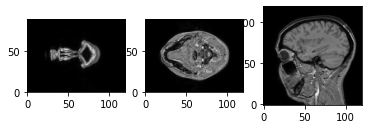

In [22]:
slice_0=image_t1_data[15,:,:]
slice_1=image_t1_data[:,20,:]
slice_2=image_t1_data[:,:,30]
show_slices([slice_0,slice_1,slice_2])

(120, 90)
(120, 90)
(120, 120)


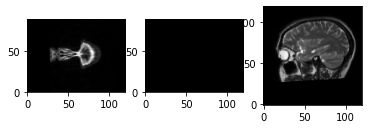

In [23]:
slice_0=image_t2_data[15,:,:]
slice_1=image_t2_data[:,20,:]
slice_2=image_t2_data[:,:,30]
show_slices([slice_0,slice_1,slice_2])